# Automatic Export

The purpose of this notebook is to demonstrate methods of automatically exporting notebooks without manual intervention from the user.

In [2]:
import tensorflow as tf
import seaborn as sb
import numpy as np
import json
from dataclasses import dataclass
from typing import Callable, Tuple, Dict
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from IPython.display import IFrame, HTML
import requests
from requests import Response
from datetime import datetime

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Caskroom/miniconda/base/envs/spatial/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
dir(datetime)

['MAXYEAR',
 'MINYEAR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'sys',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [18]:
ric: str = "AAPL.O"
    
(ri)
print(to_json_log("AAPL.O"))

with open("archive/init_log.json", "a") as f:
    f.write(json.dumps(to_json_log("AAPL.O")))

{'2021-09-16 19:16:04.910872': 'AAPL.O'}


Suppose we have some code...

In [5]:
@dataclass
class DataSeries:
    x: tf.Tensor
    y: tf.Tensor
        

@dataclass
class FunctionPlotter:
    f: Callable[[float], float]
        
    def gen_series(self, support: tf.Tensor) -> DataSeries:
        ys: tf.Tensor = tf.constant([self.f(x) for x in support])
        out: DataSeries = DataSeries(x=support, y=ys)
        return out
    
    def plot_series(self, support: tf.Tensor, figsize: Tuple[int, int] = (10, 7)) -> DataSeries:
        data: DataSeries = self.gen_series(support)
        
        fig: Figure
        ax: Axes
        fig, ax = plt.subplots(figsize=figsize)
        
        line: Axes = sb.lineplot(x=data.x, y=data.y)
        return line

...and a plot.

<AxesSubplot:>

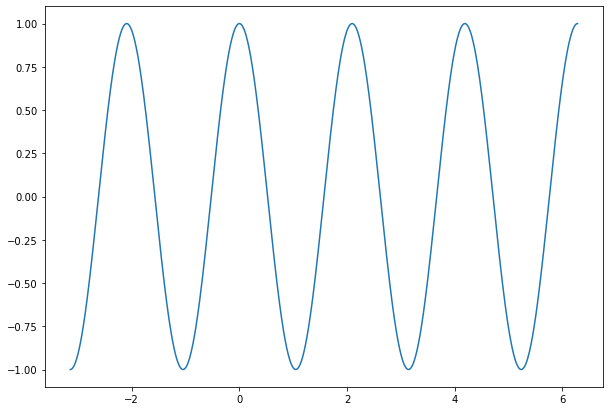

In [6]:
fp: FunctionPlotter = FunctionPlotter(lambda x: np.cos(3*x))
fp.plot_series(support=tf.linspace(-np.pi, 2*np.pi, 1000))

## Extracting Data With JavaScript

The first thing to note is that we can pull information with JavaScript into the Python namespace. For example, we could extract the URL of this notebook session.

In [11]:
%%javascript

Jupyter.notebook.kernel.execute("window_loc = '" + window.location +"'")

<IPython.core.display.Javascript object>

In [12]:
window_loc

'http://127.0.0.1:8888/notebooks/demos/AutoExport.ipynb'

Why would we want to do this? It turns out that a simple modification of the URL will yield a static HTML copy by way of [`nbconvert`](https://nbconvert.readthedocs.io/en/latest/index.html).

In [13]:
to_static_html_url: Callable[[str], str] = lambda url: url.replace("notebooks", "nbconvert/html")
html_url: str = to_static_html_url(window_loc)
print(html_url)
    
IFrame(src=html_url, width=800, height=500)

http://127.0.0.1:8888/nbconvert/html/demos/AutoExport.ipynb


That said, we don't want to just house the file in an IFrame in the original notebook or new tab. We want to download it to a user-specified location.

In [14]:
to_html_name: Callable[[str], str] = lambda url: url.split("/")[-1].split(".")[0] + ".html"

def export_html(url: str) -> None:
    response: Response = requests.get(url, params={"download": True})
    out_path: str = to_html_name(url)
    with open(out_path, "wb") as f:
        f.write(response.content)
        
    print(response.url)
    
    
export_html(html_url)

http://127.0.0.1:8888/login?next=%2Fnbconvert%2Fhtml%2Fdemos%2FAutoExport.ipynb%3Fdownload%3DTrue


In [15]:
!jupyter nbconvert --to html --output=file_name --output-dir=archive/ AutoExport.ipynb

[NbConvertApp] Converting notebook AutoExport.ipynb to html
[NbConvertApp] Writing 629053 bytes to archive/file_name.html


In [16]:
!ls archive

file_name.html init_log.json


In [19]:
!cat archive/init_log.json

{"2021-09-16 19:14:24.643425": "AAPL.O"}{"2021-09-16 19:16:04.912206": "AAPL.O"}